In [39]:
import pathlib
import os

import numpy as np
from matplotlib import pyplot as plt
from tqdm import notebook
import torch

import pandas as pd
import albumentations as A
from albumentations.pytorch import ToTensorV2

In [40]:
%load_ext autoreload
%autoreload 2

from dataset import OCRDataset, PLATE_ALPHABET
from utils import draw_bbox, load_json
from transforms import AugTransform
from model import CRNN

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [41]:
archive_name = pathlib.Path("data", "raw", "contest02_data_generated.zip")

In [42]:
base_transforms = [
    A.OneOf([
            A.Perspective(fit_output=False, scale=(0.015, 0.1), pad_val=(255, 255, 255)),
            A.Affine(scale={"x": (0.2, 1.5), "y": (0.3, 1.5)}, fit_output=True, p=0.65)
        ]
        ),
        A.ColorJitter(brightness=0.8, contrast=0.1, p=0.75),
        A.ISONoise(intensity=[1, 1], p=0.15),
        A.MotionBlur(blur_limit=10),
        A.RandomShadow(p=0.25),
        A.RandomSunFlare(src_radius=20),
        A.Resize(64, 320)
]

In [10]:
torch_transforms = [
        A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
        ToTensorV2()
    ]

In [11]:
dataset = OCRDataset(archive_name, aug_transforms=AugTransform(A.Compose(base_transforms)))

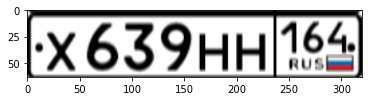

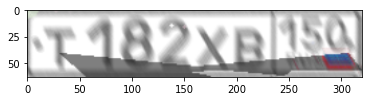

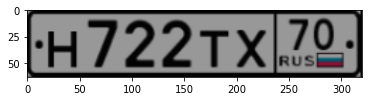

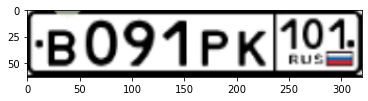

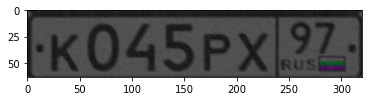

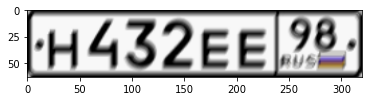

In [67]:
for index in range(6):
    plt.imshow(dataset[index]["img"])
    plt.show()

In [54]:
dataset = OCRDataset(archive_name, aug_transforms=AugTransform(A.Compose(base_transforms + torch_transforms)))

In [55]:
# model = CRNN(ALPHABET)
uniq = set()

In [56]:
for i in range(len(dataset)):
    uniq.update(dataset[i]["text"])